Установим последнюю стабильную версию SpaCy (на момент начала проекта это была 3.4):

In [ ]:
!pip install "spacy~=3.4.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.4.4 which is incompatible.


Проверим корректность установки SpaCy:

In [ ]:
!python -m spacy info

2023-05-23 22:43:47.405145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 22:43:48.779500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-23 22:43:50.507460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 22:43:50.508151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Установим библиотеку spacy-transformers, которая позволит нам использовать нейросети-трансформеры:

In [ ]:
!pip install spacy-transformers==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.7/187.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.0 MB/s eta 0:00:00


Установим библиотеку с логгером, которым будем пользоваться для отслеживания результатов:

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


В качестве baseline-показателя попробуем провести тренировку с использованием базовых конфигураций SpaCy. Для этого загрузим с сайта SpaCy четыре варианта самого простого конфигурационного файла и проведем тренировку на датасете с шестью тегами и двумя тегами для каждого из них.

Перед этим установим большую модель для английского языка с векторами:

In [ ]:
!python -m spacy download en_core_web_lg

2023-05-07 13:31:23.852739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:31:25.365410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:31:27.307310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:31:27.307854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - Тренировка на CPU + эффективность + два тега:

In [ ]:
!python -m spacy init fill-config cpu_t2v_eff_2T.cfg cpu_t2v_eff_2T.cfg

2023-05-07 13:32:00.156157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:32:01.280708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:32:03.467089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:32:03.467742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy debug data ./cpu_t2v_eff_2T.cfg

2023-05-07 13:32:10.791376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:32:12.525070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:32:14.672831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:32:14.674203: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy train -g 0 cpu_t2v_eff_2T.cfg --output ./output_test_1

2023-05-07 13:32:38.092015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:32:39.125901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:32:40.979286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:32:40.979852: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - Тренировка на CPU + эффективность + шесть тегов:

In [ ]:
!python -m spacy debug data ./cpu_t2v_eff_6T.cfg

2023-05-07 13:56:42.811760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:56:43.846461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:56:45.519426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:56:45.519977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy train -g 0 cpu_t2v_eff_6T.cfg --output ./output_test_1

2023-05-07 13:57:24.726867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 13:57:25.781986: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 13:57:27.490202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 13:57:27.490803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на CPU + точность + два тега:

In [ ]:
!python -m spacy init fill-config cpu_t2v_acc_2T.cfg cpu_t2v_acc_2T.cfg

2023-05-07 14:10:18.132140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:10:19.614934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 14:10:21.593824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 14:10:21.594465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy train -g 0 cpu_t2v_acc_2T.cfg --output ./output_test_1

2023-05-07 14:11:20.170542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:11:21.211255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 14:11:22.506416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 14:11:22.506850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на CPU + точность + шесть тегов:

In [ ]:
!python -m spacy train -g 0 cpu_t2v_acc_6T.cfg --output ./output_test_1

2023-05-07 14:24:46.297762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:24:48.207282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 14:24:50.777179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 14:24:50.777851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на GPU + эффективность + два тега:

In [ ]:
!python -m spacy init fill-config gpu_trf_eff_2T.cfg gpu_trf_eff_2T.cfg

2023-05-07 16:22:46.862989: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 16:22:47.884269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 16:22:49.149745: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 16:22:49.150180: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-07 16:22:57.649991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 16:22:58.648495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 16:22:59.946146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 16:22:59.946604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на GPU + эффективность + шесть тегов:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_6T.cfg --output ./output_test_1

2023-05-07 16:46:37.450919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 16:46:38.579204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 16:46:40.024669: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 16:46:40.025104: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на GPU + точность + два тега:

In [ ]:
!python -m spacy init fill-config gpu_trf_acc_2T.cfg gpu_trf_acc_2T.cfg

2023-05-07 18:14:55.456145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:14:57.485305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 18:14:59.944218: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 18:14:59.944741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-07 18:15:39.771527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:15:40.832451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 18:15:42.230591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 18:15:42.231076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Тренировка на GPU + точность + шесть тегов:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_6T.cfg --output ./output_test_1

2023-05-07 19:14:28.495870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 19:14:29.631835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 19:14:31.235246: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 19:14:31.235748: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Как видим, трансформер дает нам самые хорошие показатели. Посмотрим, справляется ли какая-то другая модель лучше, чем roberta-base, попутно проверив, какой вариант трансформера дает более хорошие показатели: с фокусом на точности или эффективности.
С фокусом на точности:
 - bert-base-cased

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-07 20:47:55.103080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 20:47:56.836686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 20:47:59.291919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 20:47:59.292555: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - bert-base-uncased:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-07 21:34:40.523447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 21:34:42.190053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 21:34:44.073792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 21:34:44.074240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - xlm-roberta-base:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-07 23:17:00.687278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 23:17:01.713001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 23:17:02.994724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 23:17:02.995199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - distilbert-base-cased:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-07 23:58:43.086690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 23:58:45.216802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-07 23:58:47.682914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 23:58:47.683374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - distilroberta-base:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-08 00:30:30.573927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 00:30:31.753803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 00:30:33.165655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 00:30:33.166110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Итак, самой лучшей моделью оказалась roberta-base, показав максимальную точность в 0,26. Чтобы попробовать улучшить этот результат, попробуем снизить гиперпараметр threshold, чтобы повысить явно проседающий recall:

 - При threshold = 0,4:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-08 01:06:44.706295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 01:06:45.832766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 01:06:47.217811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 01:06:47.218226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

При threshold = 0,3:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-08 02:08:43.999889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 02:08:45.181034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 02:08:46.655099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 02:08:46.655609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

При threshold = 0,2:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-08 02:34:54.352480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 02:34:55.493696: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 02:34:56.931293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 02:34:56.931882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Посмотрим, насколько успешно нейросеть справляется с разметкой различных тегов, воспользовавшись установленным ранее логгером:

In [ ]:
!python -m spacy train -g 0 gpu_trf_acc_2T.cfg --output ./output_test_1

2023-05-08 16:20:05.515759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 16:20:06.554462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 16:20:07.882586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 16:20:07.883018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

Проверим перформанс трансформера с фокусом на эффективности на разных нейросетях.
 - roberta-base

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1 #seed = 10

2023-05-08 17:24:31.930734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 17:24:32.963554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 17:24:34.250183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 17:24:34.250616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

 - bert-base-cased

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 18:22:22.550108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 18:22:24.707641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 18:22:27.234827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 18:22:27.236414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

 - bert-base-uncased:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 19:00:53.151636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 19:00:54.996380: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 19:00:57.731956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 19:00:57.732603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

 - xlm-roberta-base:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 20:22:50.779388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 20:22:51.887032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 20:22:53.274493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 20:22:53.274972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - distilbert-base-cased:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 21:04:11.111307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 21:04:13.139887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 21:04:15.748695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 21:04:15.749242: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

 - distilroberta-base:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 21:44:38.810173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 21:44:41.058431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 21:44:43.716575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 21:44:43.717282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Итак, самой лучшей моделью оказалась roberta-base с фокусом на эффективности, показав максимальную точность в 25.60. Чтобы попробовать улучшить этот результат, попробуем снизить гиперпараметр threshold, чтобы повысить явно низкий recall:

При threshold = 0,4:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-08 23:41:17.888610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 23:41:19.496926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-08 23:41:20.999404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 23:41:20.999831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

При threshold = 0,3:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-09 01:08:40.493529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 01:08:42.053640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 01:08:43.502395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 01:08:43.502907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

При threshold = 0,2:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-09 13:12:37.499283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 13:12:38.640217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 13:12:41.029543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 13:12:41.030128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Итак, самый лучший результат всё же показывает архитектура с фокусом на эффективности.

Посмотрим, насколько успешно нейросеть справляется с разметкой различных тегов, воспользовавшись установленным ранее логгером WandDB. Для двух тегов:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_2T.cfg --output ./output_test_1

2023-05-09 13:48:18.314229: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 13:48:19.381591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 13:48:20.730326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 13:48:20.730752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Значения recall, precision и f-score для L1-Lexis:
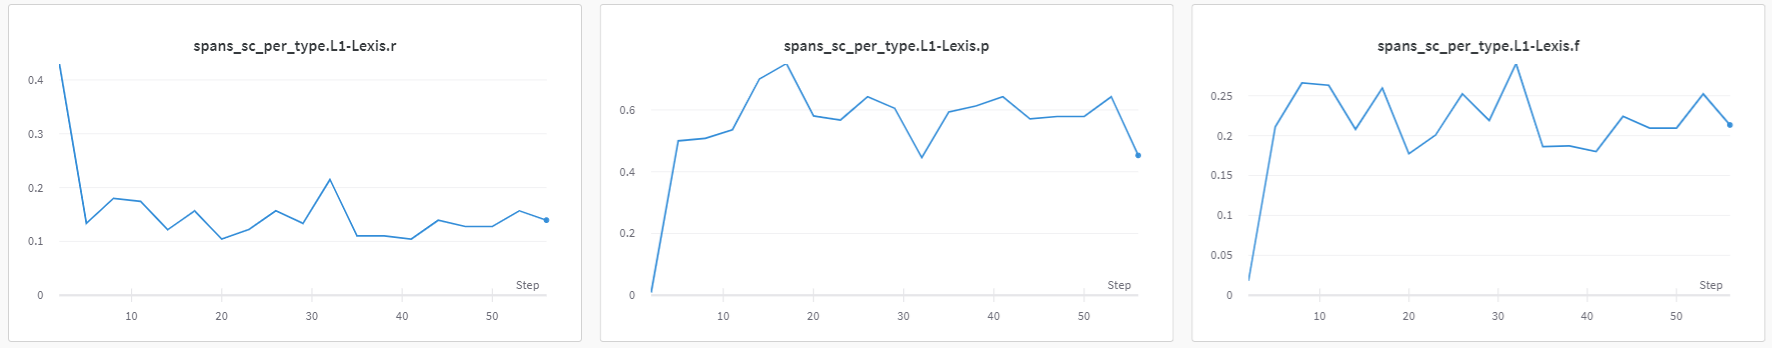

Значения precision, recall и f-score для L1-Grammar:
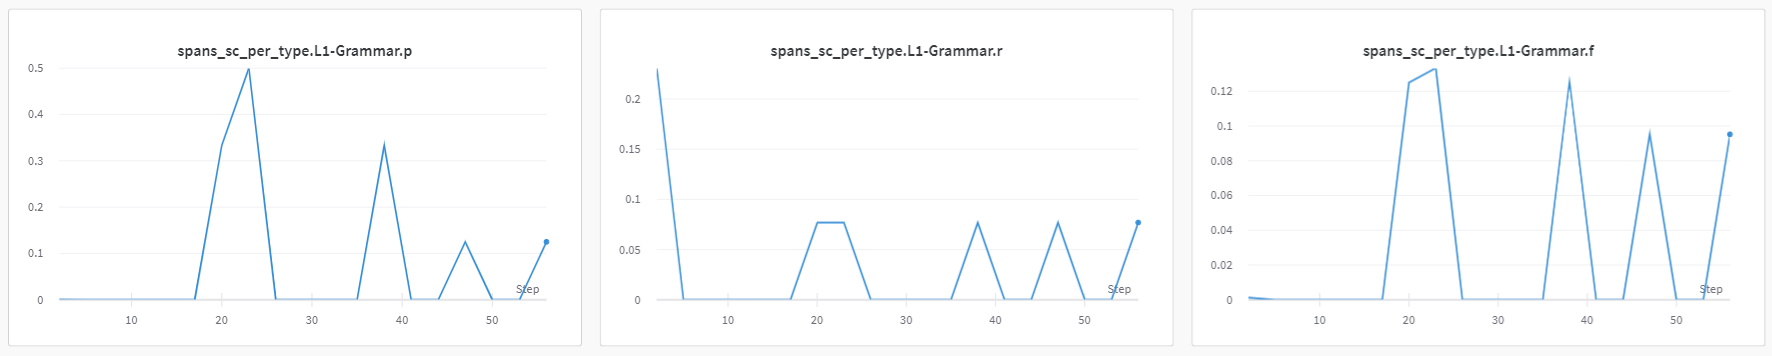

Для шести тегов:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff_6T.cfg --output ./output_test_1

2023-05-09 17:25:48.292480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 17:25:49.263579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 17:25:50.506277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 17:25:50.506696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Значения precision, recall, f-score для тега Synonyms:
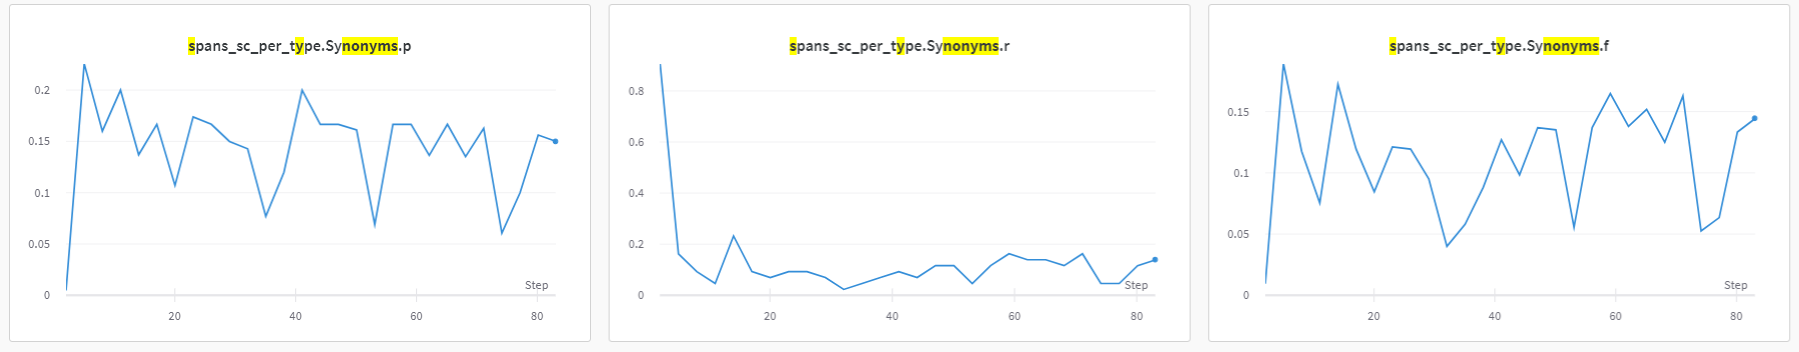

Значения precision, f-score, recall для тега Copying expression:
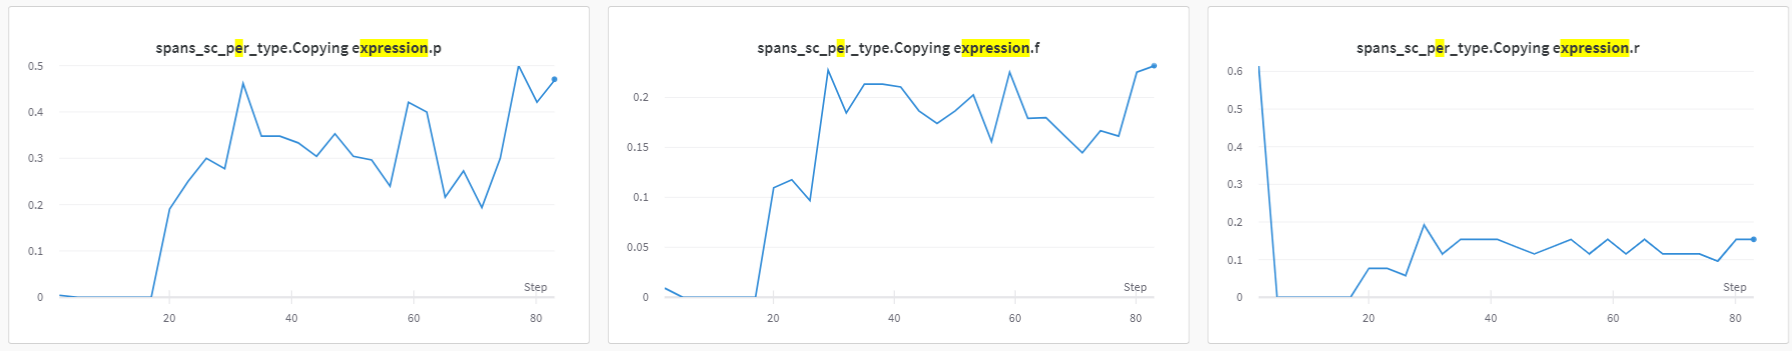

Значения для тега Tense semantics:
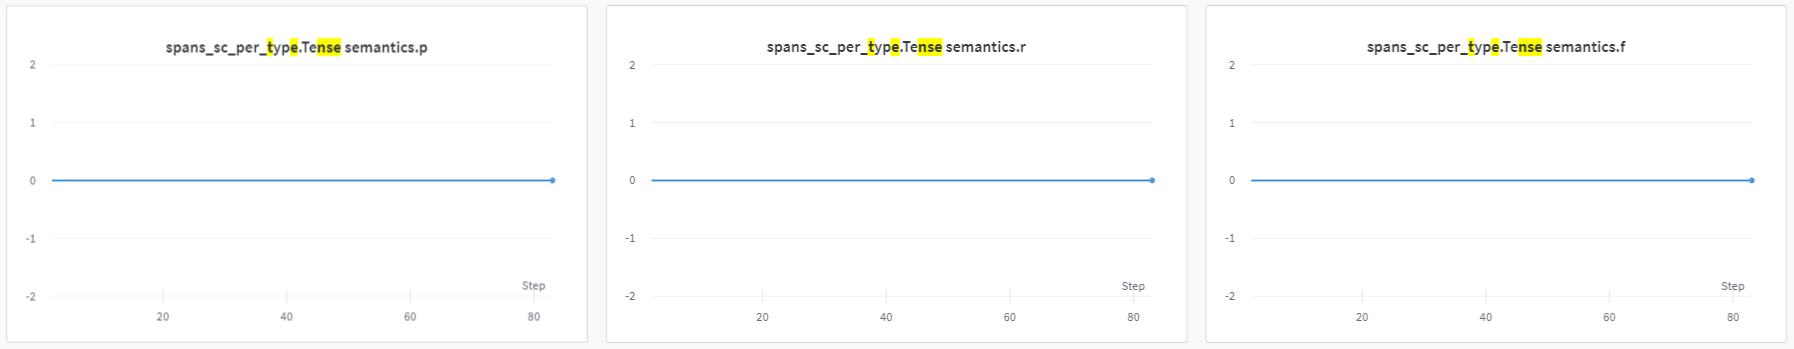

Значения f-score, recall, precision для тега Word form transmission:
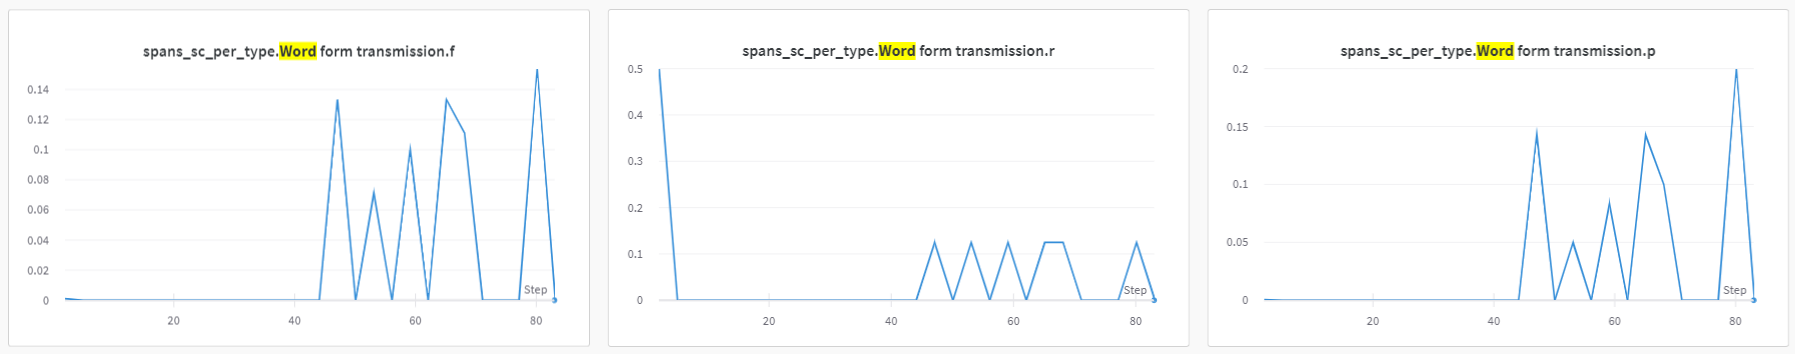

Значения recall, precision, f-score для тега Transliteration:
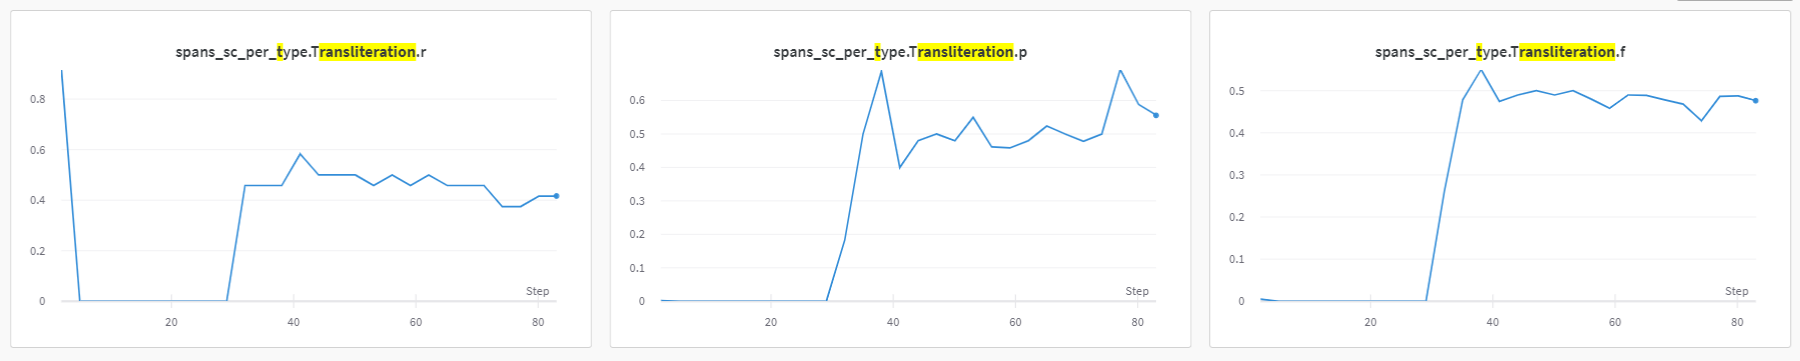

Значения recall, precision, f-score для тега Morphemic transplantation:
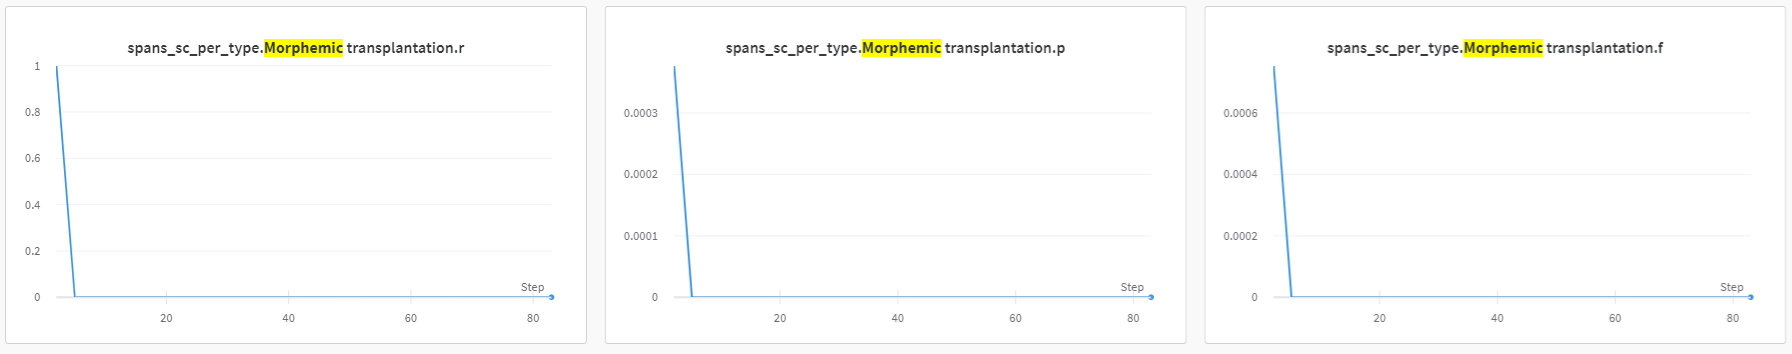

Обратив внимание на значительную разницу в успешности разметки разных тегов, попробуем собрать в один датасет все примеры из шеститегового датасета, относящиеся к одному тегу, и натренировать трансформер для распознавания одного конкретного типа ошибок.

Например возьмем тег Synonyms:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_test_1

2023-05-09 19:42:43.620283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 19:42:45.002978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-09 19:42:46.254624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-09 19:42:46.255077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Как видим, процент точности резко подскочил. На него нельзя правиться, потому что набор данных слишком маленький, но для улучшения результатов можно увеличить выборку для каждого датасета. 

Попробуем провести тренировку на новой выборке, тренируя отдельный трансформер для каждого из шести тегов. 

1. Synonyms:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_synonyms

2023-05-22 09:43:16.199220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 09:43:17.204571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-22 09:43:18.545191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-22 09:43:18.545730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
import spacy
from spacy import displacy

nlp1 = spacy.load("/content/output_synonyms/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


2. Copying expression:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_expression

2023-05-22 10:42:43.281039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: output_expression
ℹ Saving to output directory: output_expression
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-05-22 10:42:51,867] [INFO] Set up nlp object from config
[2023-05-22 10:42:51,882] [INFO] Pipeline: ['transformer', 'spancat']
[2023-05-22 10:42:51,887] [INFO] Created vocabulary
[2023-05-22 10:42:51,888] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification mo

In [ ]:
nlp1 = spacy.load("/content/output_expression/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


3. Tense semantics:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_tense

2023-05-22 11:35:25.837882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: output_tense
ℹ Saving to output directory: output_tense
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-05-22 11:35:36,535] [INFO] Set up nlp object from config
[2023-05-22 11:35:36,551] [INFO] Pipeline: ['transformer', 'spancat']
[2023-05-22 11:35:36,554] [INFO] Created vocabulary
[2023-05-22 11:35:36,556] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a

In [ ]:
nlp1 = spacy.load("/content/output_tense/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


4. Word form transmission:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_word

2023-05-22 12:20:42.830137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: output_word
ℹ Saving to output directory: output_word
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-05-22 12:20:53,897] [INFO] Set up nlp object from config
[2023-05-22 12:20:53,914] [INFO] Pipeline: ['transformer', 'spancat']
[2023-05-22 12:20:53,917] [INFO] Created vocabulary
[2023-05-22 12:20:53,919] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a B

In [ ]:
nlp1 = spacy.load("/content/output_word/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


5. Transliteration:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_transliteration

2023-05-22 13:02:58.949896: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: output_transliteration
ℹ Saving to output directory: output_transliteration
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-05-22 13:03:12,202] [INFO] Set up nlp object from config
[2023-05-22 13:03:12,218] [INFO] Pipeline: ['transformer', 'spancat']
[2023-05-22 13:03:12,222] [INFO] Created vocabulary
[2023-05-22 13:03:12,223] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassif

In [ ]:
nlp1 = spacy.load("/content/output_transliteration/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


Теперь попробуем натренировать трансформер на всём датасете, используя возможности wandb для отслеживания результатов:

In [ ]:
!python -m spacy train -g 0 gpu_trf_eff.cfg --output ./output_general

2023-05-22 14:08:16.049726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: output_general
ℹ Saving to output directory: output_general
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-05-22 14:08:30,363] [INFO] Set up nlp object from config
[2023-05-22 14:08:31,262] [INFO] Pipeline: ['transformer', 'spancat']
[2023-05-22 14:08:31,267] [INFO] Created vocabulary
[2023-05-22 14:08:31,269] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model fr

Значения precision, f-score, recall для тега Synonyms: 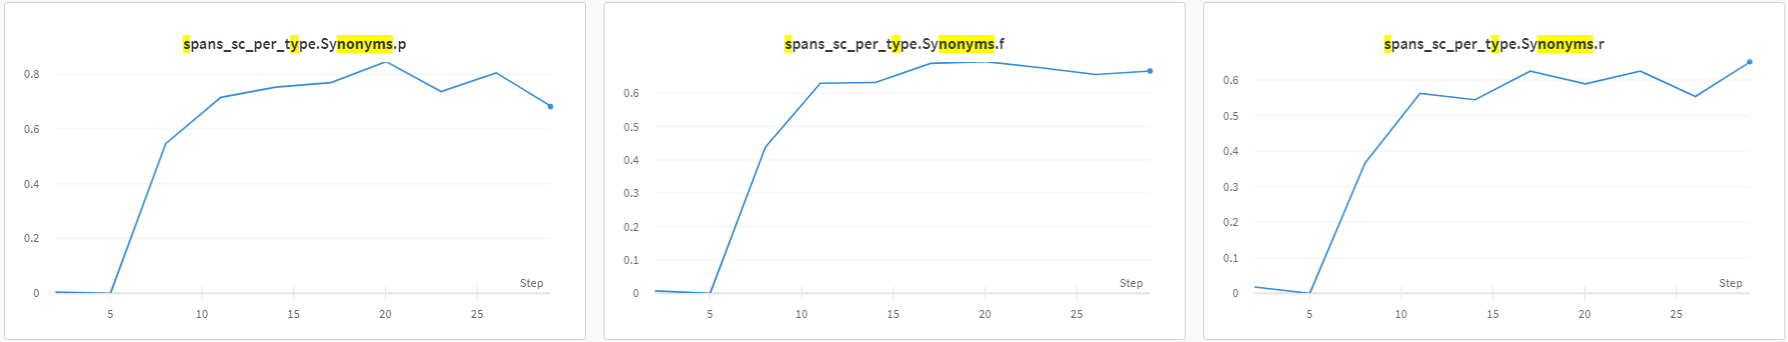

Значения recall, f-score, precision для тега Copying expression: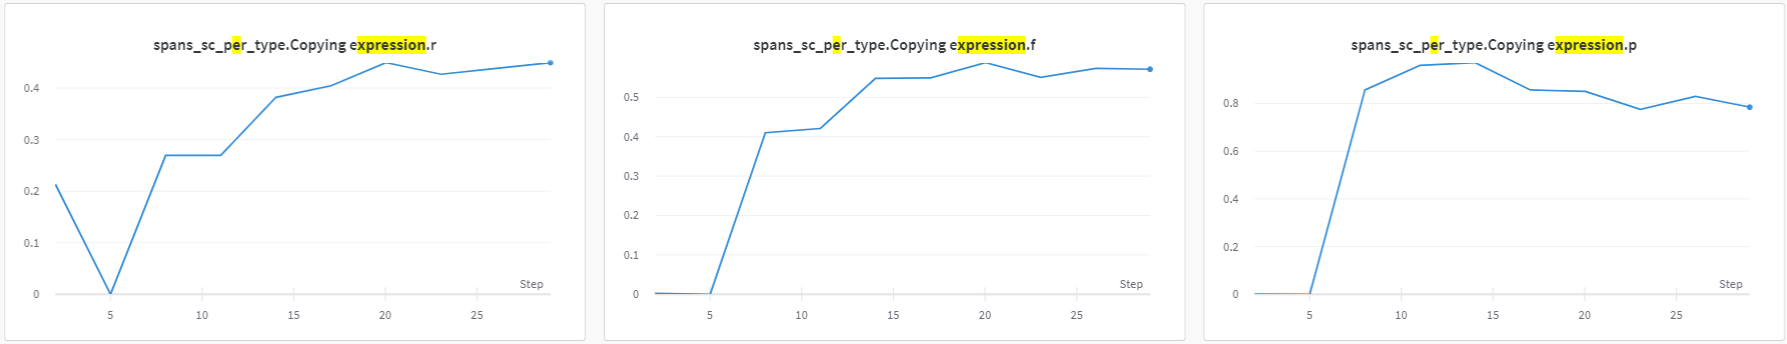

Значения precision, recall, f-score для тега Tense semantics: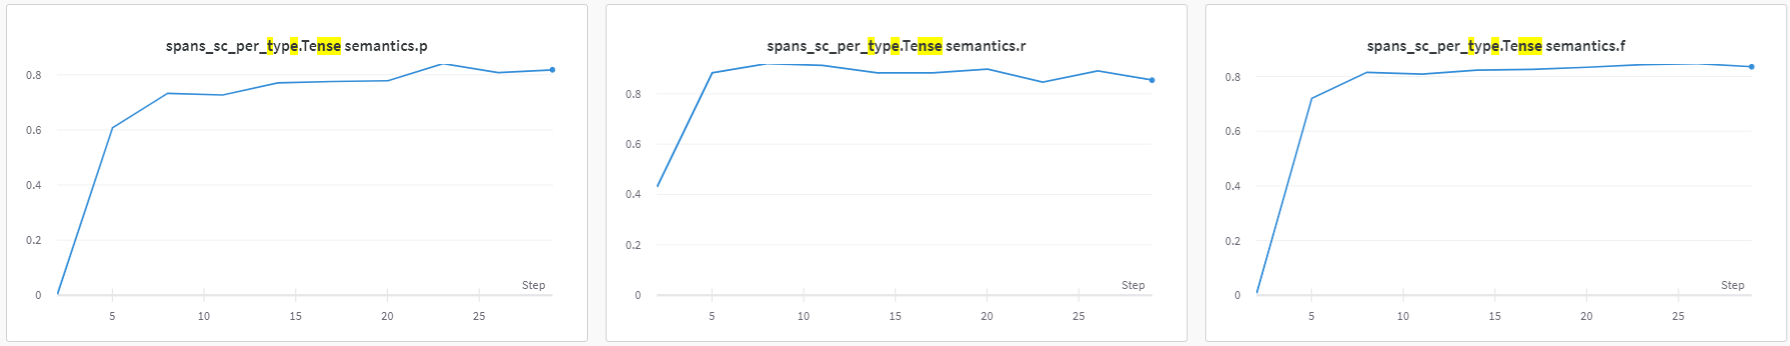

Значения precision, f-score, recall для тега Word form transmission: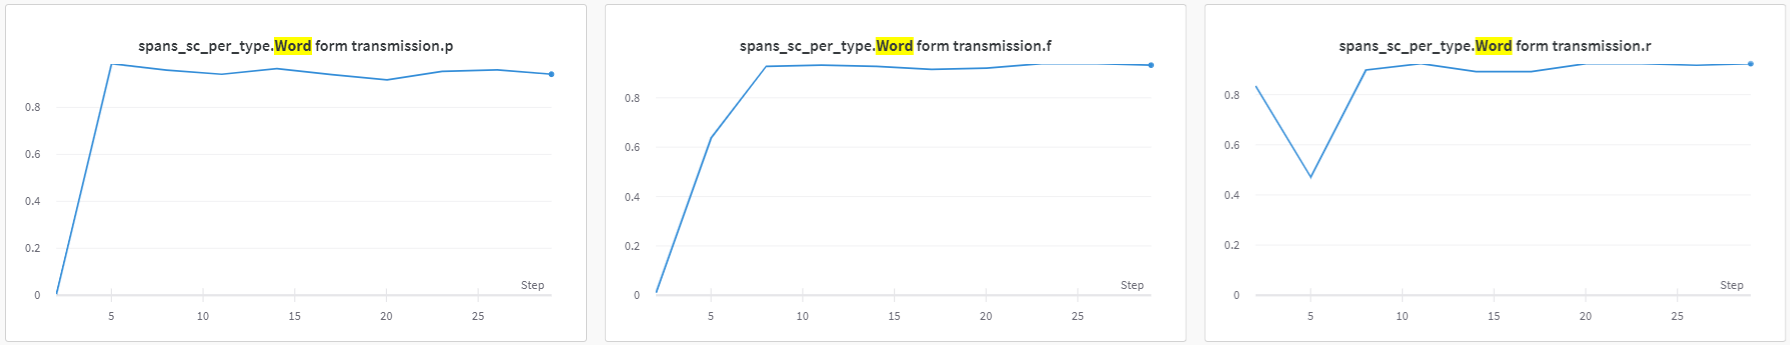

Значения recall, precision, f-score для тега Transliteration: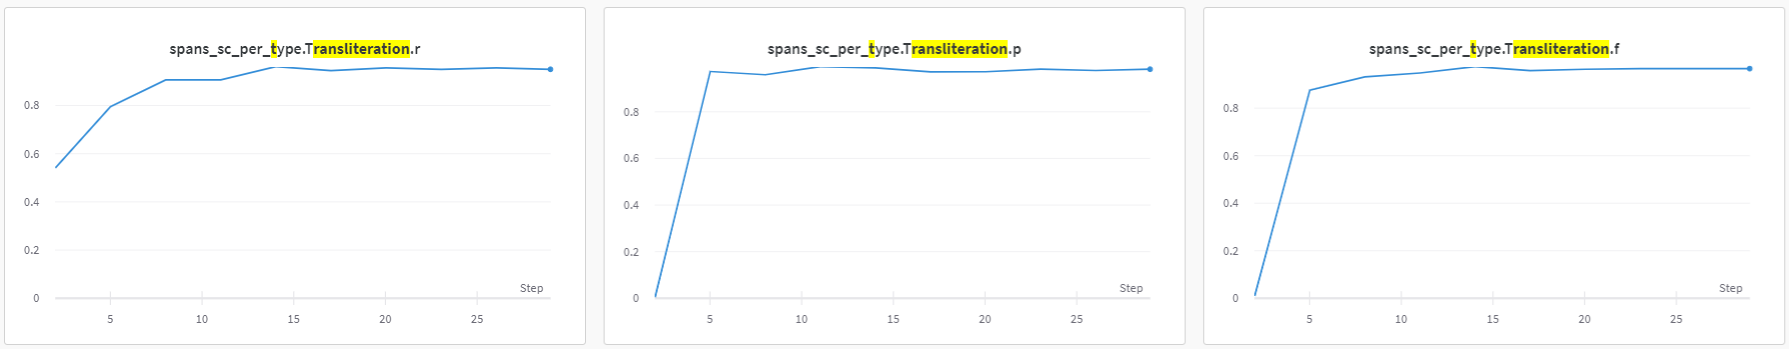

In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/general_model/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

Датасет для разметки, собранный из корпуса REALEC (использовался выше):

In [ ]:
list_test = ["Overall, the dynamics in world total investment and the changes of funding in developed and developing countries were quite similar, for all of them peaked at almost the same year and then slightly fell down, generally, the investment in 2006 was lower than in 2013.",
"Then there was a sharp decrease so by 2013 the worldwide outlay accounted for 214 billions.",
"Moreother there is a huge difference between part of 60+ years people.",
"It is clearly seen that in Yemen the share of children before 14 years tend to become less - from 50,1% in 2000 to 37% in 2050.",
"Is it possible to reduce crime by giving longer prison sentences of is it alternative ways?",
"The charts provide information about use of Facebook from Desktop and Mobile from 2012 to 2013 and different reasons for using Facebook among men and women.",
"Young people are interested in taking drugs and they try to find money in such easy ways as crimes.",
"In post-school 70 percent were the same men a postgraduate diploma and women undergraduate diploma.",
"The graph gives information about the overage proportion of the population aged 65 and over between 1940 and 2040 in Japan, Sweden and USA.",
"The overall trend is that in Yemen the part of population from 15 to 59 years rises while in Italy reduces.",
"It can be clearly seen that population rates in Sweden and USA are approximately on the same level with several discrepancies in the time between 2000 and 2020, whereas proportion of population over 65 years in Japan was on the low level with slight fluctuations between 1940 and 2000 and then there was a dramatically increase between 2000 and 2040.",
"The graph shows that almost equal number of people use such network.",
"Inherently, people can find anything they want in large shops with self speaking name.",
"Besides, it can increase pices on harmful production, thus, public will no incentive to smoke and drink.",
"In these day and age we can observe such situation that small businesses dont have an equall acess to market as the large.",
"Parents can try to know friends of their child, so they will know what they are doing and who they are.",
"The graph illustrates the percentage use of three different networks by online adults in the USA by age group.",
"First of all, the the invasion of huge companies provides aborigens with employment, frequently that means literally saving their lives, because in many poor countries people even starve to death without any resources to live, as they do not have an oppotrtunity to earn ther living.",
"In the modern world, a lot attention and efforts is paid to sports facilities.",
"Particularly, percentage of generation aged from 15 to 59 is predicted to grow by just above 10 percent, whereas it is expected that the share of children not older 14 years dramatically reduce from about 50 percent to 37.",
"After 2000, line of this american population are increasing .",
"With the help of such activities they will learn to communicate with peers and distinguish between real and virtual life.",
"For example when it is impossible to show a personal touch, smoking and other.",
"At the first glance, it is clear that in every country except Yemen in 2000 the majority of population consists of people from 15 to 59 years.",
"It can be predicted that growth of people who able to work (15-59 years) will develop on economy in Yemen.",
"That would help to prevent the expanding of young criminals.",
"To sum up, it can be observed that, overall, the proportion of population over 65 years had groun up since 1940 in such countries like Japan, USA and Sweden, but in different ways.",
"The overall trend is the biggest population of 15-59 years reducing of people of 0-14 years in Yemen and Italy both in 2000 and 2050.",
"We can not forger about our world-history, about own histories and culterals.",
"These opportunities, which open behind most people, will benefit the economy of every country from one hand.",
"To conclude, I would like to say that all building has to serve their own purpose; however, sometimes this purpose is to make people happy and leave them memorizable moments about certain place.",
"Undoubtedly, we are face to face with a big problem because if a lot of air travel, that conributes global warming and air pollution, is unnecessary and we are just wasting it, goverments will have find solution of it.",
"What the point to build a masterpiece when it will not survive long time?",
"As for projections for 2050, there will be significant rising of amount of people of 60+ years (42,3%) and decreasing of people of 15-49 years (46,2%) and 0-14 years (11,5%).",
"In Rio de Janeiro temperatures not decrease and increase very quckly.",
"On the one hand, child spent a lot of time in his or her family.",
"As for projections for 2050, there will be significant rising of amount of people of 60+ years (42,3%) and decreasing of people of 15-49 years (46,2%) and 0-14 years (11,5%).",
"But if talk about developing countries we can see a tendency in the investments in renewable energy.",
"Architects always had very important mission in our world.",
"As for projections for 2050, there will be significant rising of amount of people of 60+ years (42,3%) and decreasing of people of 15-49 years (46,2%) and 0-14 years (11,5%).",
"Secondly, in 2000 the population of Italy was 61,6% of people of 15-59 years.",
"To conclude, all the countries of this graph have tendency to reduce their percentage difference in earnings between men and women between 1980 and 1995 because after movement of women' emancipation women began to work and not to depend on their men.",
"The predictions are increasing of people of 15-59 years (57,3%) and significant reducing of populations of 0-14 years (37,0%).",
"Secondly, students who are in category of 26-40 years old have the main part of Sports and Health courses (62 percent) whereas the same category has the least percentage on the chart about Arts courses(25 percent).",
"Firstly, there were 46,3% of people of 15-59 years and 50,1% of 0-14 years in Yemen.",
"Some buildings can be real works of art, people even come to see them from far countries and other continents.",
"The percentage of children to 14 years is much smaller than in Yemen in the same year and it is only 14,3 points.",
"In other hand, it takes more time and efforts.",
"From my point of view, it is far significant for buildings to be useful than just beautiful.",
"As the predictions for 2050, the percentage of 15-59 years-people will increase by more than 10 points.",
"From my point of view, skill of finding a balance between design and simplisity of the consctuction is of a great value in that situation.",
"In my opinion, aesthetic part of building appearence is highly important because it creates the tone of surronding athmosphere which is supposed to be friendly in order to function well.",
"As we can see the marketable trend that all population of Yemen consists in the whole of such groups of population as children to 14 years and 15-59 year-people.",
"Hopefully, in the future people will put more attention to the environment issue and will try to forget about their private interest in favour the Earth.",
"According these researches, all types of transport contribute to the ecological disaster; the main culprit is a plane.",
"But qvontity of people whose age is 15-59 years will increase since 46,3% from 57,3%.",
"In 2000 more then hals people of Yemen aged were 0-14 yars.",
"That why I believe, that methods, that are used in the Norwegian jails are better, than just giving longer prison sentences.",
"He could work legally and buy the thing he stole instead sitting in prison for that action.",
"Nevertheless, making the house as fancy as one can is an purpos which worth to aim because it is always better to admire the view of the urban jungles.",
"Even if an architect make the plan of his or her project with the perfect sence of buauty, it may not be appropriate with the buldings which are located aroud.",
"In 2050 population in Italy will be older, because proportion of 60+ years rise and proportion of 15-59 years population decrease.",
"Yemen's 15-59 years population will increase to 57,3% compare with Italy, where this population will have big declination from 61,6% to 46,2%.",
"But nowadays the situation was changed, and houses mixed these factors.",
"I personally agree with thought that people otside the home play more important role in any child's life.",
"It helps the world become better.",
"The first bar chart, which illustrates the use of the social net, shows, that at the whole, users are more prone to connect to Facebook via desktop rather than mobile.",
"Not only do they get much of important knowledge indoors but they also can relax; escape from outside routine and enjoy the silence in their houses.",
"Is he in league with the aborigens ?"]

Второй датасет, собранный из корпуса REALEC:

In [ ]:
list_test = ["The given bar chart and table provide information about obesity in both genders in Canada from 1990 and 2005 and the percentage of them that did physical activities regularly.",
"In any way, the decision to reduce airflights will distinct the personal life of humans.",
"Metals are goods that has the biggest procent of transportation by rail.",
"To pay for or to carry the research is a good idea anyway and popularity is a real pusher to try harder than government, for example.",
"At the sane time, the number of old people in Italy will have trend to increase and even will be approximately equal to the number of people in immediate age (42,3%).",
"The percentage of children will be enough small: only 11,5% Vise a versa, their percentage in Yemen will be enough large (37%), if we compare these countries.",
"Nowadays, in the century of modern technology and a huge amount of super smart gadgets, despite the advantages of innovations people often feel themselves worse than their ancestors way for example 20 years ago.",
"Laws and other regulations can help to stop this awful process, for instance, by prohibiting private air crafts who make harm too like real planes used by many travel companies.",
"First of all, proportion of population aged 54 and over in Japan is viewous different that other countries.",
"Boys and girls have both situation in question about education.",
"Firstly, the medicine itself as well as it's development, curing uncurable by now ilnesses, profilactic and the attendence of complex health researches is not less important.",
"In the world about 3000 airoports and each other of them everyday fly down and fly up a great number of air transport.",
"Of course, it reduce time for travel but, may be, planes are cause of much consequanses for environment.",
"Of course we should pay attention on that mostly but now we are able to do more than that with our technologies.",
"I prsonally believe that nothing is able to make you happy, but you.",
"Even today for example in Alaska there are rapidly rising water levels and ice erosion.",
"The given chart and table represent the information about Canadian children suffering from overwheighting and the statistics of those kids who did exercises on a regular basis.",
"Also, these people think that this is against human nature to make money in such areas as music and movies.",
"Then was a dip and a dramatically climb with hitting a peak of 279$ (world total) and of approximately 175$ for developed countries in 2011.",
"To begin with, internet piracy belongs to a crimerate.",
"Interestingly, all the data in technology rose.",
"There are several arguements in favour of the belief that it is crucial to centre on global problems.",
"For example, young people in age 26-35 years who prefered technology had the bigest number in this area.",
"Furthemore, sometimes women don't want to get a high education level.",
"This number stepped up from 40 billions in 1995 and achived the value of about 60 billions minutes in 2002.",
"Wherea, in different regions this is result was twenty three point two millions at the same year.",
"Then, there are such destinations which hard to reach by means of transport.",
"Sweden chart is almost equal to the US one, only big discrepancy is 20% in 2020 in Sweden versus below 15% in the US.",
"We can see three parametres: date of opening, kilometres of route and passangers per one year (in millions people).",
"In the same time developing countries continued to invest more and more till 2012, but finally experienced the decrease in 2013.",
"On the other hand, the right of using illegal content is the choice for someone who wat to do it and it realised without any preassure.",
"It is believed that after this period they will be free and clear and will not any aftermaths.",
"The data below demontstrates the proportion of population among citizens of age 65 and over in Japan, Sweden and the United States during one handrend years (1940-2040).",
"Undergraduate diploma and Bechelor's degree were occupied by woman, it is counted for 72 and 53 per cent.",
"Moreover, Africa that had the biggest percent of male and female children with no education also cut down the quantity.",
"Sharing books can rise the level of education of people, and this is one of the proses of pirates.",
"While other men, who would want to study at this university will have needness to search another university, where vacancies will open.",
"Examples, when people wore cured by sport are widespread, but belief in this reduces all the time.",
"Second diagram shows than food products it's the most popular kind for road transportation, while machinery minimum used there.",
"On the other hand, I am not sure that all of us problem in health are goes from technology.",
"Firstly, there were 46,3% of people of 15-59 years and 50,1% of 0-14 years in Yemen.",
"Despite this fact, people are not able to escape them but they can reduce it using different methods and approaches, which are created by scientists and ordinary people respectively.",
"So, some countries (USA, for example) don't allow their people do copies or download without paying for product.",
"Shares of the HTC and Blackberry were quite similar and unchanged over whole period, while shares of Samsung increasing from 2011 year and reached to 45% percentage of share in 2013.",
"So, American soldiers from Vietnam got different diseases, also the American system of healthcare negatively changing to become a state instituteвЂ¦ so we noticed the passing (?), of the US graph.",
"I think this is the right decision.",
"The general trend was that men were more succesful in three stages and female qualification was higher only in two stage, for example, in bachelor's degree.",
"From the table we can state that in 1990 boys were the majority that did physical activity with a 57%, but the difference from the girls was not that big - only 6%.",
"The bar chart plots how the number of children who have no opportunity to get primary education changed from 2000 to 2012 by region and gender.",
"We do not know the reasons, why he/she used drugs and can not judge so confidently.",
"In my opinion, people should control amount of time which they spend with technology, because, for example, more my friends have problems with eyes.",
"But if the facultie take the same number of students both genders there would be only 6 men on the first course last year.",
"Nowadays a lot of people are sure that professional sportsmen who have taken illegal drugs are to be banned for a concrete period of time.",
"Like an average man, who earns not so huge amount of money, I just do, what is in my possibilities.",
"While governments can help other countries with poor conditions to reduce pollution, our planet can be cured and saved.",
"To sum up, it can be noticed that Facebook stays the most popular social networks among the all age category.",
"Some people think that every person in the world should be able to find all the content he or her needs for free.",
"Practise shows that mostly unpopular singers relates negatively to illegal widespread of their songs, so they don't have another source of getting money, because their concerts are badly organized and no one buy tickets.",
"Money can give you power, costy items and opportinities to live in luxurious hotels but they will not give you true friends and self-confidence.",
"Also, the electricity is distributed for heating rooms and water in higer persentage than for different electric tools.",
"However, if we talk about all transports in the world, then we can see that each of it warm nature.",
"But, on the other hand, if we give up an opinion about sport, we will find a lot effective opportunities to make public health increased.",
"One more: frequent visiting to doctors - to control the level of health, that prevent you of being sick.",
"Firstly, government can advertise popular types of sport which are able now for public.",
"In the rest of world 23 million people hadn't access after that from 2000 to 2012 the member were declining and become to 5 million.",
"Although scientists said that microwaves is safe for health there are still lack of information in other positions, for example, micro wave diagnosty.",
"The level of unemployed decreased in the Middle East and Latin America.",
"So they often have not hot a change to support in stressful moment or give an helpful advice.",
"This essay will discuss and provide arguments for both opinions.",
"Firstly, if there was a higher rate in South Asia, comparing to the Rest of World in 2000, then in 2012 is became lower simultaneously with the others, but obviously in 2012 the Rest of World had a higher level than South Asia had.",
"Furthermore, turning to the industrial sector, Australian people tend more to have a job in this field than Indonesian workers.",
"Wich rate was get a high in 2015, with 7,9% and become lower in 2014, it is now 7,5%.",
"To begin with, surely it is important for anything to serve its purpose starting with casual notebooks and ending with scientific investigations.",
"To conclude, I'ed like to say, that producers or film-creators and internet users must create an agreement, which would not only protect their property rights, but also will be comfortable for internet users.",
"Moreover, this measure do not cover the whole population an does not impact on adult which do not want to interact with sports facilities.",
"Nowadays, there are a huge amount of international companies which have their business in many countries in the world.",
"To sum up, that kind of information about employment by gender in Indonesia and Australia show to us the tendency of workers and some interest of male and female.",
"On the other side of the coin, it can be disagreed with the statement about pursueing downloading people.",
"Overall, Japan has the unique tendency of growth apart from Sweden and the USA.",
"In Japan the quantiny of that people was at the same level from 1960 to about 1985, after that it started to grow.",
"In high classes some children have stress because they are afraid of their pass of last exams.",
"At the same time sports are popular with 26-40 year olds, they take much more than a half of all students visiting thouse courses.",
"One of these companies is SpaceX developed by Elon Mask.",
"The politics were unwilling to cooperate with the public",
"And last, but not least, is that the illegal pirate copies aren't good for the economy of the countries.",
"The aborigens shared their food with the travellers"
]

Проверка моделей на втором датасете:

In [ ]:
import spacy
from spacy import displacy

nlp1 = spacy.load("/content/drive/MyDrive/output_synonyms/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:237: UserWarning: [W117] No spans to visualize found in Doc object with spans_key: 'sc'. If this is surprising to you, make sure the Doc was processed using a model that supports span categorization, and check the `doc.spans[spans_key]` property manually if necessary.

Available keys: ['sc']
  warnings.warn(Warnings.W117.format(spans_key=spans_key, keys=keys))


In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/output_expression/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/output_tense/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/output_transliteration/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/output_word/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)

In [ ]:
nlp1 = spacy.load("/content/drive/MyDrive/general_model/model-best")

for string_1 in list_test:
    doc = nlp1(string_1)
    displacy.render(doc, style="span", jupyter=True)